## Imports

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from keras.datasets import mnist
from google.colab import drive

## Set up SIFT & Google Drive

In [ ]:
sift = cv.SIFT_create()
drive.mount('/content/drive/')

Mounted at /content/drive/


## Load the MNIST dataset

In [ ]:
(x_train_val, y_train_val), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


## Example of extracting key points with SIFT

### Select an image

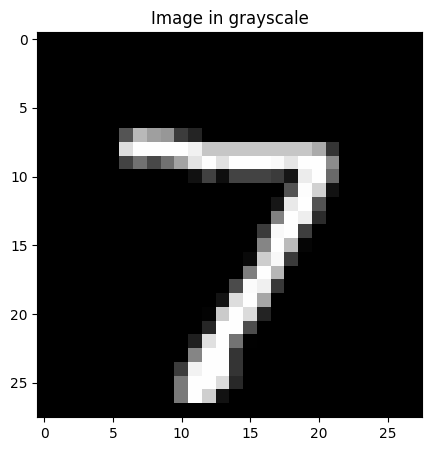

In [ ]:
img = x_test[0]

plt.figure(figsize=(5, 5))
plt.title("Image in grayscale")
plt.imshow(img, cmap="gray")

### Extract key points

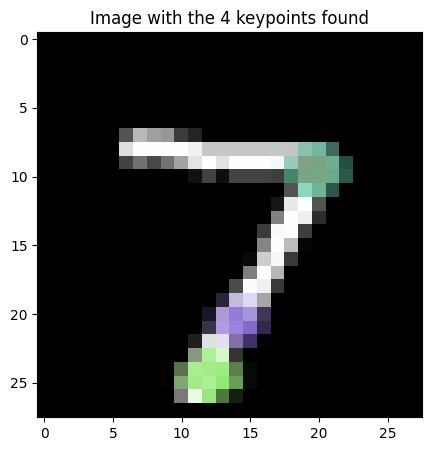

In [ ]:
img_keypoints = sift.detect(img, None)

img_with_keypoints = cv.drawKeypoints(img, img_keypoints, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(5, 5))
plt.title("Image with the {} keypoints found".format(len(img_keypoints)))
plt.imshow(img_with_keypoints)

## Example \#1: use SIFT to compare two images (numbers)

### Select two images to compare

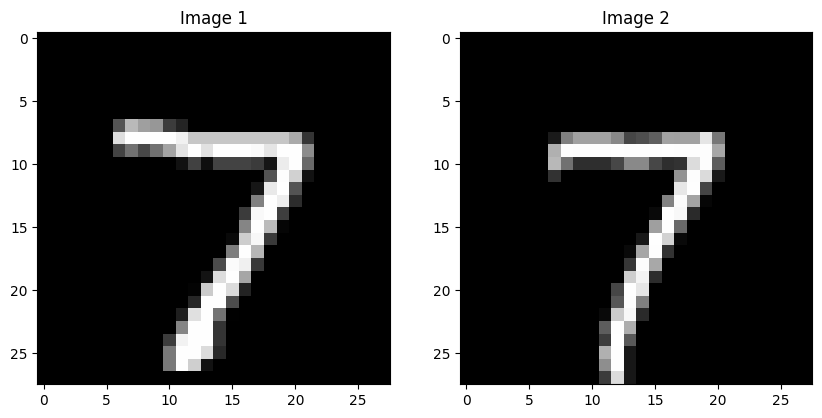

In [ ]:
img1 = x_test[0]
img2 = x_test[3572]

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img1, cmap="gray")
axes[0].set_title("Image 1")
axes[1].imshow(img2, cmap="gray")
axes[1].set_title("Image 2")

plt.show()

### Extract keypoints and compute descriptors

4 keypoints found for image 1

2 keypoints found for image 2



Text(0.5, 1.0, 'Image 2 with the 2 keypoints found')

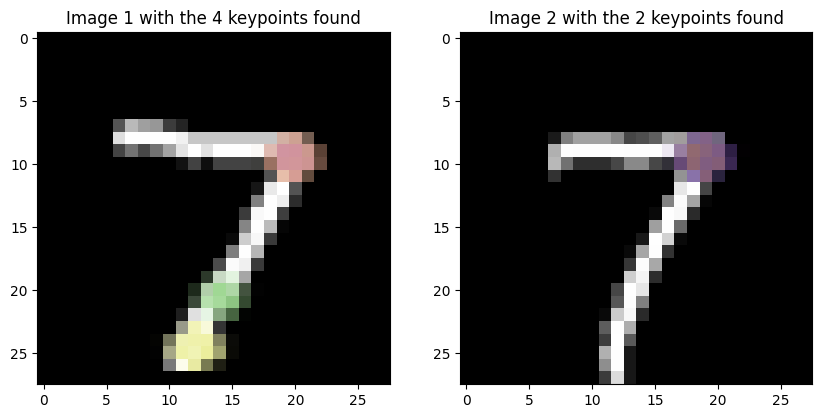

In [ ]:
img1_keypoints, img1_descriptors = sift.detectAndCompute(img1,None)
img2_keypoints, img2_descriptors = sift.detectAndCompute(img2,None)

print("{} keypoints found for image 1".format(len(img1_keypoints)))
print("\n{} keypoints found for image 2\n".format(len(img2_keypoints)))

img1_with_keypoints = cv.drawKeypoints(img1, img1_keypoints, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_with_keypoints = cv.drawKeypoints(img2, img2_keypoints, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img1_with_keypoints, cmap="gray")
axes[0].set_title("Image 1 with the {} keypoints found".format(len(img1_keypoints)))
axes[1].imshow(img2_with_keypoints, cmap="gray")
axes[1].set_title("Image 2 with the {} keypoints found".format(len(img2_keypoints)))

### Match keypoints with descriptors

2 matches found



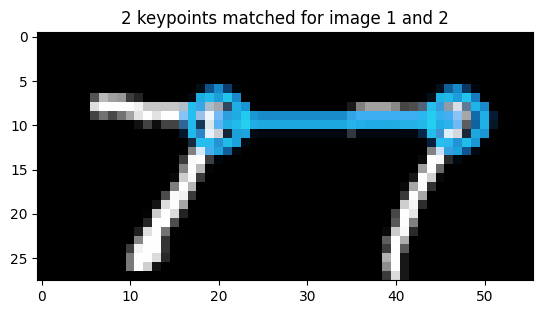

In [ ]:
"""
bf = cv.BFMatcher()

matches = bf.knnMatch(descriptors_1, descriptors_2, 2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv.drawMatchesKnn(img1, keypoints_1, img2, keypoints_2, matches, None, flags=2)

plt.imshow(img3)
"""

bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches12 = bf.match(img1_descriptors, img2_descriptors)
matches12 = sorted(matches12, key = lambda x:x.distance)

print("{} matches found\n".format(len(matches12)))

img12_matches = cv.drawMatches(img1, img1_keypoints, img2, img2_keypoints, matches12, img2, flags=2)

plt.title("{} keypoints matched for image 1 and 2".format(len(matches12)))
plt.imshow(img12_matches)

## Example \#2: use SIFT to compare two images (LEGO bricks)

### Select a reference image

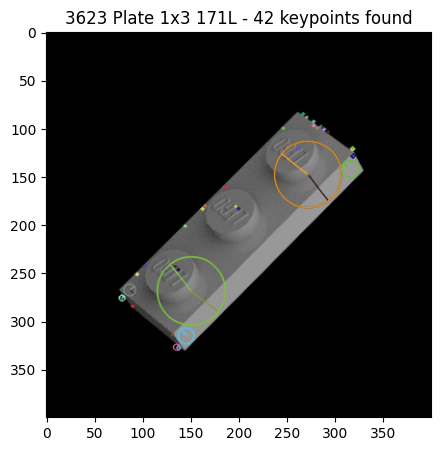

In [ ]:
img3 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/3623 Plate 1x3 171L.png')

img3_keypoints, img3_descriptors = sift.detectAndCompute(img3,None)

img3_with_keypoints = cv.drawKeypoints(img3, img3_keypoints, img3, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(5, 5))
plt.title("3623 Plate 1x3 171L - {} keypoints found".format(len(img3_keypoints)))
plt.imshow(img3_with_keypoints)

### Match the image to itself

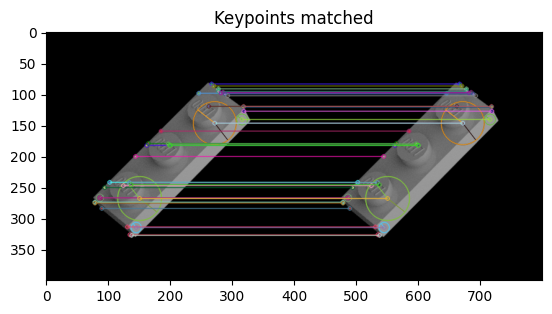

In [ ]:
matches33 = bf.match(img3_descriptors, img3_descriptors)
matches33 = sorted(matches33, key = lambda x:x.distance)

img33 = cv.drawMatches(img3, img3_keypoints, img3, img3_keypoints, matches33, img3, flags=2)

plt.title("Keypoints matched")
plt.imshow(img33)

### Select two other images

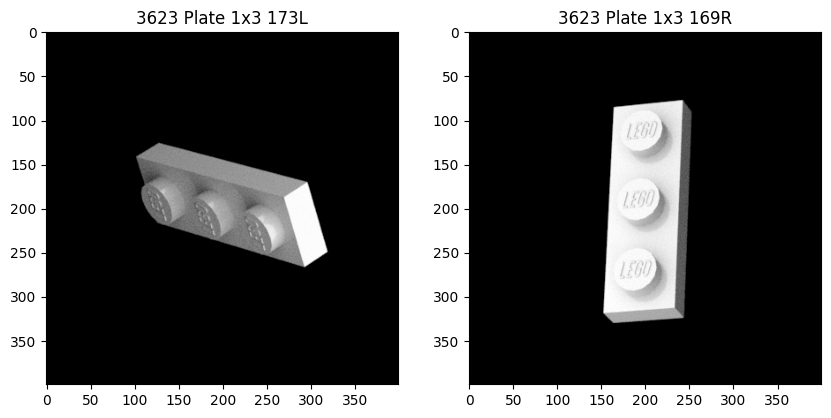

In [ ]:
img4 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/3623 Plate 1x3 173L.png')
img4 = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

img5 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/3623 Plate 1x3 169R.png')
img5 = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img4, cmap="gray")
axes[0].set_title("3623 Plate 1x3 173L")
axes[1].imshow(img5, cmap="gray")
axes[1].set_title("3623 Plate 1x3 169R")

plt.show()

### Extract keypoints and compute descriptors

72 keypoints found for image 4 - 3623 Plate 1x3 173L

38 keypoints found for image 5 - 3623 Plate 1x3 169R



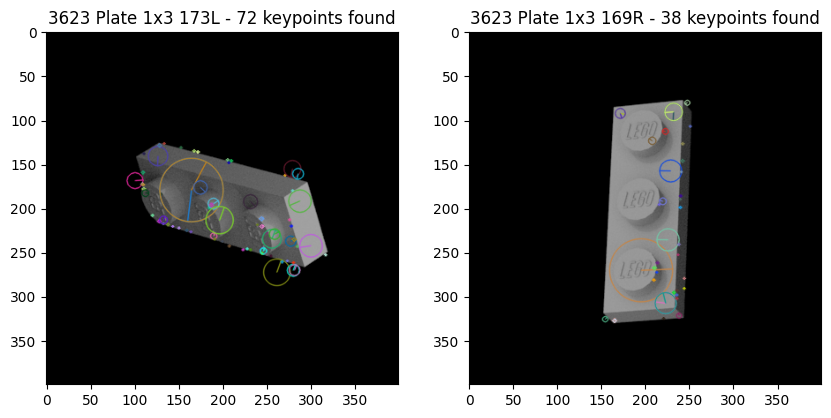

In [ ]:
img4_keypoints, img4_descriptors = sift.detectAndCompute(img4,None)
img5_keypoints, img5_descriptors = sift.detectAndCompute(img5,None)

print("{} keypoints found for image 4 - 3623 Plate 1x3 173L".format(len(img4_keypoints)))
print("\n{} keypoints found for image 5 - 3623 Plate 1x3 169R\n".format(len(img5_keypoints)))


img4_with_keypoints = cv.drawKeypoints(img4, img4_keypoints, img4, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img5_with_keypoints = cv.drawKeypoints(img5, img5_keypoints, img5, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(img4_with_keypoints, cmap="gray")
axes[0].set_title("3623 Plate 1x3 173L - {} keypoints found".format(len(img4_keypoints)))
axes[1].imshow(img5_with_keypoints, cmap="gray")
axes[1].set_title("3623 Plate 1x3 169R - {} keypoints found".format(len(img5_keypoints)))

plt.show()

### Match keypoints with descriptors

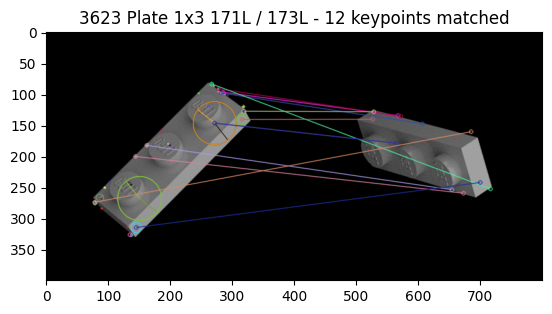

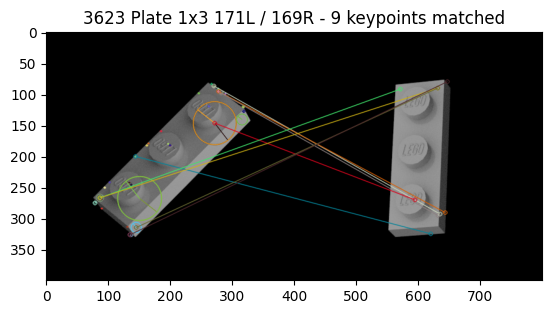

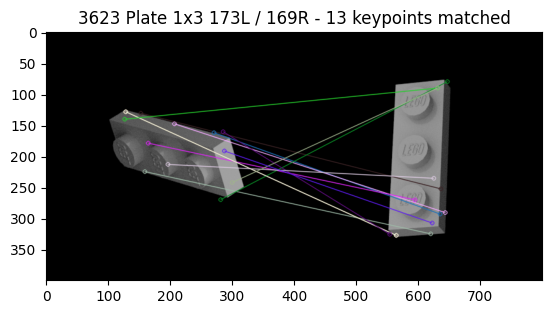

In [ ]:
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

matches34 = bf.match(img3_descriptors, img4_descriptors)
matches34 = sorted(matches34, key = lambda x:x.distance)

matches35 = bf.match(img3_descriptors, img5_descriptors)
matches35 = sorted(matches35, key = lambda x:x.distance)

matches45 = bf.match(img4_descriptors, img5_descriptors)
matches45 = sorted(matches45, key = lambda x:x.distance)

img34 = cv.drawMatches(img3, img3_keypoints, img4, img4_keypoints, matches34, img4, flags=2)
img35 = cv.drawMatches(img3, img3_keypoints, img5, img5_keypoints, matches35, img5, flags=2)
img45 = cv.drawMatches(img4, img4_keypoints, img5, img5_keypoints, matches45, img5, flags=2)


plt.figure()
plt.title("3623 Plate 1x3 171L / 173L - {} keypoints matched".format(len(matches34)))
plt.imshow(img34)

plt.figure()
plt.title("3623 Plate 1x3 171L / 169R - {} keypoints matched".format(len(matches35)))
plt.imshow(img35)

plt.figure()
plt.title("3623 Plate 1x3 173L / 169R - {} keypoints matched".format(len(matches45)))
plt.imshow(img45)

## Example \#3: perfume bottles

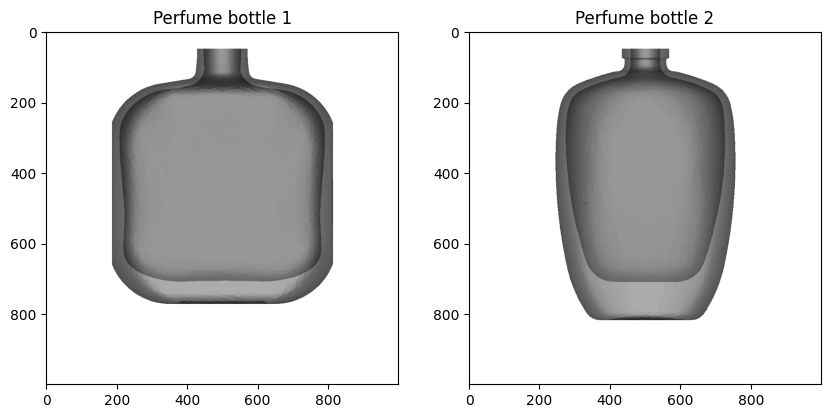

In [ ]:
bottle1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/Flacon 1.png')
bottle2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images/Flacon 2.png')

bottle1 = cv.cvtColor(bottle1, cv.COLOR_BGR2GRAY)
bottle2 = cv.cvtColor(bottle2, cv.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(bottle1, cmap="gray")
axes[0].set_title("Perfume bottle 1")
axes[1].imshow(bottle2, cmap="gray")
axes[1].set_title("Perfume bottle 2")

plt.show()

61 keypoints found for the first perfume bottle

59 keypoints found for the second perfume bottle



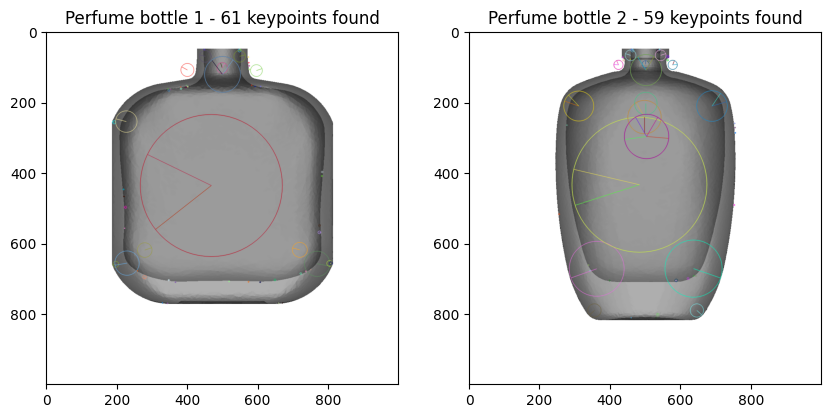

In [ ]:
bottle1_keypoints, bottle1_descriptors = sift.detectAndCompute(bottle1, None)
bottle2_keypoints, bottle2_descriptors = sift.detectAndCompute(bottle2, None)

bottle1_with_keypoints = cv.drawKeypoints(bottle1, bottle1_keypoints, bottle1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
bottle2_with_keypoints = cv.drawKeypoints(bottle2, bottle2_keypoints, bottle2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("{} keypoints found for the first perfume bottle".format(len(bottle1_keypoints)))
print("\n{} keypoints found for the second perfume bottle\n".format(len(bottle2_keypoints)))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(bottle1_with_keypoints, cmap="gray")
axes[0].set_title("Perfume bottle 1 - {} keypoints found".format(len(bottle1_keypoints)))
axes[1].imshow(bottle2_with_keypoints, cmap="gray")
axes[1].set_title("Perfume bottle 2 - {} keypoints found".format(len(bottle2_keypoints)))

plt.show()

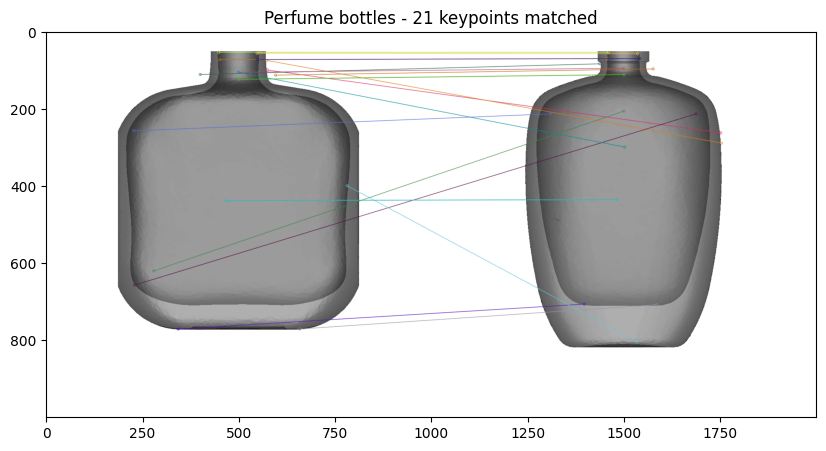

In [ ]:
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

bottleMatches = bf.match(bottle1_descriptors, bottle2_descriptors)
bottleMatches = sorted(bottleMatches, key = lambda x:x.distance)

bottleMatchingImg = cv.drawMatches(bottle1, bottle1_keypoints, bottle2, bottle2_keypoints, bottleMatches, bottle2, flags=2)

plt.figure(figsize=(10, 5))
plt.title("Perfume bottles - {} keypoints matched".format(len(bottleMatches)))
plt.imshow(bottleMatchingImg)

Text(0.5, 1.0, 'Perfume bottle 2')

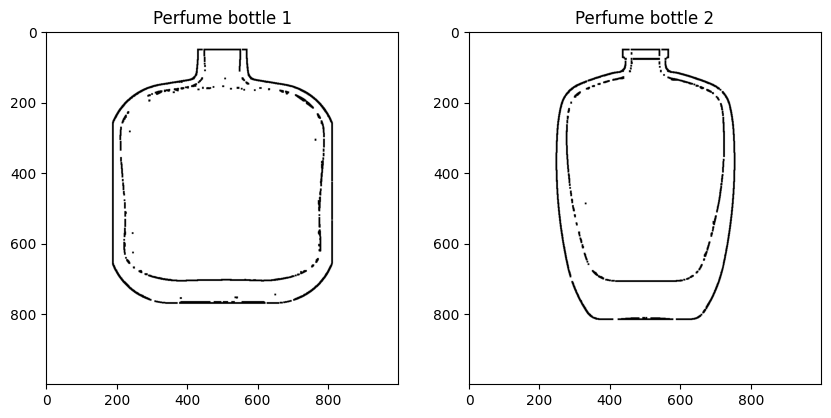

In [ ]:
bottle1_thresholded = cv.adaptiveThreshold(bottle1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
bottle2_thresholded = cv.adaptiveThreshold(bottle2, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

kernel = np.ones((5,5),np.uint8)
bottle1_closed = cv.morphologyEx(bottle1_thresholded, cv.MORPH_CLOSE, kernel)
bottle2_closed = cv.morphologyEx(bottle2_thresholded, cv.MORPH_CLOSE, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(bottle1_closed, cmap="gray")
axes[0].set_title("Perfume bottle 1")
axes[1].imshow(bottle2_closed, cmap="gray")
axes[1].set_title("Perfume bottle 2")

349 keypoints found for the first perfume bottle

298 keypoints found for the second perfume bottle



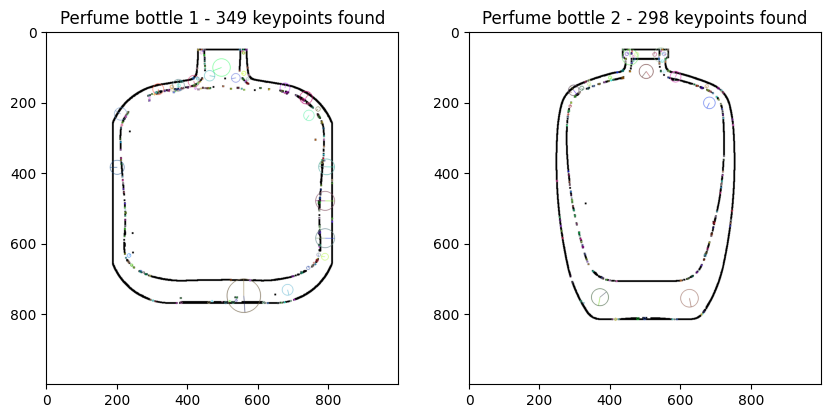

In [ ]:
bottle1_keypoints, bottle1_descriptors = sift.detectAndCompute(bottle1_closed, None)
bottle2_keypoints, bottle2_descriptors = sift.detectAndCompute(bottle2_closed, None)

bottle1_with_keypoints = cv.drawKeypoints(bottle1_closed, bottle1_keypoints, bottle1_closed, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
bottle2_with_keypoints = cv.drawKeypoints(bottle2_closed, bottle2_keypoints, bottle2_closed, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("{} keypoints found for the first perfume bottle".format(len(bottle1_keypoints)))
print("\n{} keypoints found for the second perfume bottle\n".format(len(bottle2_keypoints)))

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(bottle1_with_keypoints, cmap="gray")
axes[0].set_title("Perfume bottle 1 - {} keypoints found".format(len(bottle1_keypoints)))
axes[1].imshow(bottle2_with_keypoints, cmap="gray")
axes[1].set_title("Perfume bottle 2 - {} keypoints found".format(len(bottle2_keypoints)))

plt.show()

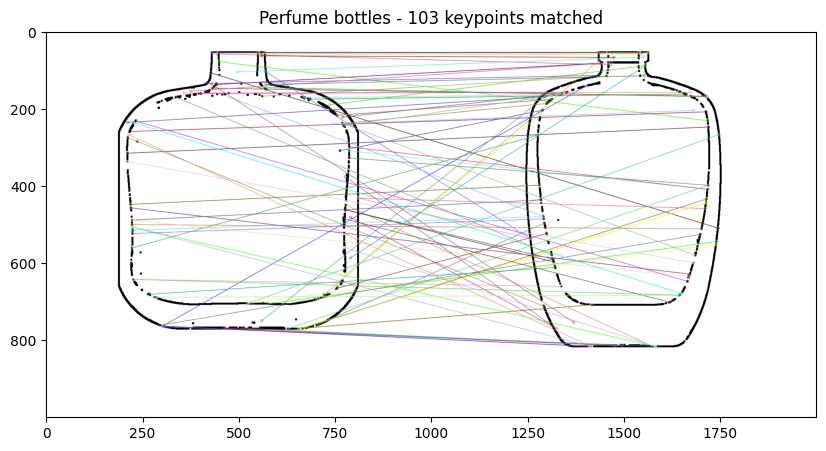

In [ ]:
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

bottleMatches = bf.match(bottle1_descriptors, bottle2_descriptors)
bottleMatches = sorted(bottleMatches, key = lambda x:x.distance)

bottleMatchingImg = cv.drawMatches(bottle1_closed, bottle1_keypoints, bottle2_closed, bottle2_keypoints, bottleMatches, bottle2, flags=2)

plt.figure(figsize=(10, 5))
plt.title("Perfume bottles - {} keypoints matched".format(len(bottleMatches)))
plt.imshow(bottleMatchingImg)